In [1]:
import pennylane as qml
from pennylane import numpy as np
from matplotlib import pyplot as plt
import time
from supplementary_code import *

In [2]:
nq = 10
depth = int(nq/2)
dev = qml.device("default.qubit", wires= nq) 

In [3]:
nq

10

In [4]:
Delta = 0.9
H = H_XXZ(Delta,wires=range(nq))

print(H)

  (0.9) [Z0 Z1]
+ (0.9) [Z1 Z2]
+ (0.9) [Z2 Z3]
+ (0.9) [Z3 Z4]
+ (0.9) [Z4 Z5]
+ (0.9) [Z5 Z6]
+ (0.9) [Z6 Z7]
+ (0.9) [Z7 Z8]
+ (0.9) [Z8 Z9]
+ (0.9) [Z9 Z0]
+ (1) [X0 X1]
+ (1) [Y0 Y1]
+ (1) [X1 X2]
+ (1) [Y1 Y2]
+ (1) [X2 X3]
+ (1) [Y2 Y3]
+ (1) [X3 X4]
+ (1) [Y3 Y4]
+ (1) [X4 X5]
+ (1) [Y4 Y5]
+ (1) [X5 X6]
+ (1) [Y5 Y6]
+ (1) [X6 X7]
+ (1) [Y6 Y7]
+ (1) [X7 X8]
+ (1) [Y7 Y8]
+ (1) [X8 X9]
+ (1) [Y8 Y9]
+ (1) [X9 X0]
+ (1) [Y9 Y0]


In [5]:
params = np.array([np.pi for _ in range(4*depth)])

In [6]:
@qml.qnode(dev)
def circuit(params, Delta, depth=depth, nq=nq):
    
    HVA_ansatz(params, Delta, depth, range(nq))
    
    return qml.expval(H)

In [7]:
cost_fn = lambda w: circuit(w, Delta=Delta, depth=depth, nq=nq)

In [8]:
start_time = time.time()    

steps = 200

optimizer = qml.AdamOptimizer(stepsize=0.5)
best_cost = cost_fn(params)
best_params = params

for j in range(steps+1):
    params2 = params
    params, cost = optimizer.step_and_cost(cost_fn, params)

    if cost < best_cost:
        best_params = params2
        best_cost = cost
        
    if j!=0 and j % 2 == 0:
        print(f"Cost at Step {j}: {cost}")

end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

Cost at Step 2: -1.4018361238539483
Cost at Step 4: -0.9062647072150927
Cost at Step 6: -2.414220519384147
Cost at Step 8: -2.9356343594144447
Cost at Step 10: -7.936219554503587
Cost at Step 12: -10.977835077667397
Cost at Step 14: -12.392426027828469
Cost at Step 16: -11.757103127040862
Cost at Step 18: -14.942384263456635
Cost at Step 20: -12.35665283055314
Cost at Step 22: -13.973558277180855
Cost at Step 24: -14.714981737658356
Cost at Step 26: -14.901176934177041
Cost at Step 28: -15.136887025419254
Cost at Step 30: -15.658491492881842
Cost at Step 32: -15.845586511165802
Cost at Step 34: -16.186393216737965
Cost at Step 36: -15.620082991342894
Cost at Step 38: -16.048266383407174
Cost at Step 40: -16.254654737240063
Cost at Step 42: -16.361024656253658
Cost at Step 44: -16.26072225735218
Cost at Step 46: -16.281757933424377
Cost at Step 48: -16.494793193618598
Cost at Step 50: -16.387582113598103
Cost at Step 52: -16.502853102705
Cost at Step 54: -16.55589412837233
Cost at Step 

In [9]:
print(best_cost)

-17.329525837603455


In [10]:
print(cost_fn(best_params))

-17.329525837603455


In [11]:
print(np.array(best_params))

[ 2.25392669  3.2000143   2.41711074  1.0779416   5.8693186   3.51690359
  1.57375822 -0.07936532 -1.7012267   0.46791707  5.35815039  0.82177473
  3.20428868  3.21303994 -0.63667965  1.9199582   1.86869231  2.98366882
  6.52776295 -0.37781274]


In [12]:
for i in range(1,10):
    
    corr = corr_function(i, best_params,0.5,depth,nq)
    
    print(i,np.abs(corr))

1 0.5408276353709788
2 0.15700743174241585
3 0.3250388879293039
4 0.08301716424740277
5 0.13393964635110908
6 0.08301716424740319
7 0.14917844327388055
8 0.1570074317424162
9 0.3310645790543645


In [13]:
# Time evolution

corr_t = []
t = []
i =  3
dt = 1/400

start_time = time.time()    
for step in range(401):
    
    t.append(dt*step)
    
    corr_dt = corr_function(i, best_params, Delta, depth, nq, perturbation='state',timesteps=step)
    
    print(step,corr_dt)
    corr_t.append(corr_dt)
    
end_time = time.time()
print('Time taken: ', (end_time-start_time)/60, ' mins.')

0 -0.28200255438883537
1 -0.2821810772388329
2 -0.28235297283592775
3 -0.2825182014343205
4 -0.28267672416649825
5 -0.28282850305491136
6 -0.28297350102346375
7 -0.2831116819088144
8 -0.2832430104714832
9 -0.28336745240676015
10 -0.2834849743554101
11 -0.2835955439141745
12 -0.283699129646062
13 -0.28379570109042257
14 -0.2838852287728073
15 -0.2839676842146053
16 -0.2840430399424563
17 -0.28411126949743626
18 -0.28417234744400705
19 -0.2842262493787381
20 -0.28427295193878144
21 -0.284312432810115
22 -0.2843446707355316
23 -0.28436964552239136
24 -0.2843873380501137
25 -0.2843977302774242
26 -0.2844008052493432
27 -0.2843965471039166
28 -0.2843849410786865
29 -0.2843659735168995
30 -0.28433963187344946
31 -0.2843059047205549
32 -0.2842647817531653
33 -0.2842162537940978
34 -0.2841603127989015
35 -0.2840969518604468
36 -0.28402616521323754
37 -0.28394794823744907
38 -0.28386229746268243
39 -0.2837692105714449
40 -0.28366868640234255
41 -0.28356072495299645
42 -0.2834453273826709
43 -0.

339 -0.16151478457402468
340 -0.16167417931390973
341 -0.16183930281281486
342 -0.162010112253626
343 -0.16218656400420114
344 -0.16236861362320623
345 -0.16255621586608965
346 -0.16274932469119463
347 -0.16294789326601256
348 -0.16315187397357464
349 -0.1633612184189861
350 -0.16357587743610003
351 -0.16379580109433542
352 -0.1640209387056355
353 -0.164251238831572
354 -0.1644866492905899
355 -0.164727117165399
356 -0.16497258881050886
357 -0.16522300985990887
358 -0.165478325234894
359 -0.16573847915203407
360 -0.16600341513129296
361 -0.16627307600428953
362 -0.16654740392270748
363 -0.16682634036685084
364 -0.16710982615434522
365 -0.16739780144898503
366 -0.1676902057697303
367 -0.16798697799984388
368 -0.1682880563961817
369 -0.16859337859862156
370 -0.16890288163964448
371 -0.16921650195405558
372 -0.16953417538885449
373 -0.1698558372132459
374 -0.17018142212879797
375 -0.17051086427974144
376 -0.1708440972634125
377 -0.17118105414083798
378 -0.17152166744746095
379 -0.17186586

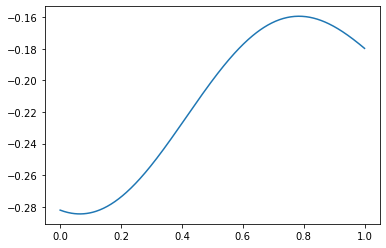

In [15]:
plt.plot(np.linspace(0,1,401),np.real(corr_t))

In [16]:
np.array(corr_t)

tensor([-0.28200255, -0.28218108, -0.28235297, -0.2825182 , -0.28267672,
        -0.2828285 , -0.2829735 , -0.28311168, -0.28324301, -0.28336745,
        -0.28348497, -0.28359554, -0.28369913, -0.2837957 , -0.28388523,
        -0.28396768, -0.28404304, -0.28411127, -0.28417235, -0.28422625,
        -0.28427295, -0.28431243, -0.28434467, -0.28436965, -0.28438734,
        -0.28439773, -0.28440081, -0.28439655, -0.28438494, -0.28436597,
        -0.28433963, -0.2843059 , -0.28426478, -0.28421625, -0.28416031,
        -0.28409695, -0.28402617, -0.28394795, -0.2838623 , -0.28376921,
        -0.28366869, -0.28356072, -0.28344533, -0.2833225 , -0.28319223,
        -0.28305455, -0.28290944, -0.28275692, -0.282597  , -0.28242968,
        -0.28225497, -0.28207289, -0.28188345, -0.28168667, -0.28148255,
        -0.28127112, -0.2810524 , -0.28082639, -0.28059313, -0.28035263,
        -0.28010491, -0.27985   , -0.27958792, -0.27931871, -0.27904237,
        -0.27875895, -0.27846847, -0.27817097, -0.2